# California Housing Prices
Median house prices for California districts derived from the 1990 census.

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

### **Importing Libraries**

In [170]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### **Uploading Datasets**

In [171]:
df = pd.read_csv("housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [172]:
# Shape of the dataset
df.shape

(20640, 10)

In [173]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### **Renaming the columns**

In [174]:
df.rename(columns={'housing_median_age':'age','total_rooms':'rooms',
       'total_bedrooms':'bedrooms','median_income' : 'income',
       'median_house_value':'housevalue'},inplace=True)

In [175]:
df.columns

Index(['longitude', 'latitude', 'age', 'rooms', 'bedrooms', 'population',
       'households', 'income', 'housevalue', 'ocean_proximity'],
      dtype='object')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   longitude        20640 non-null  float64
 1   latitude         20640 non-null  float64
 2   age              20640 non-null  float64
 3   rooms            20640 non-null  float64
 4   bedrooms         20433 non-null  float64
 5   population       20640 non-null  float64
 6   households       20640 non-null  float64
 7   income           20640 non-null  float64
 8   housevalue       20640 non-null  float64
 9   ocean_proximity  20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [177]:
df.isnull().sum()

longitude            0
latitude             0
age                  0
rooms                0
bedrooms           207
population           0
households           0
income               0
housevalue           0
ocean_proximity      0
dtype: int64

Null Values in the column bedrooms is 207

In [178]:
df.nunique()

longitude            844
latitude             862
age                   52
rooms               5926
bedrooms            1923
population          3888
households          1815
income             12928
housevalue          3842
ocean_proximity        5
dtype: int64

In [179]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#### Executing Box Plot

<AxesSubplot:>

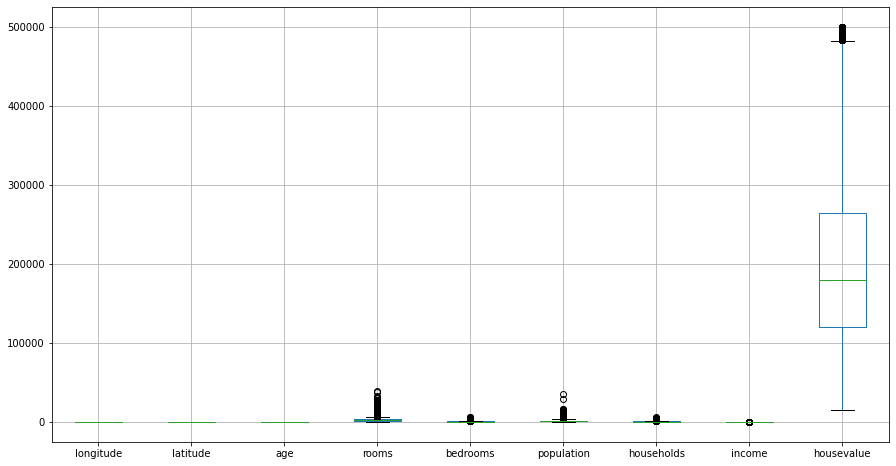

In [180]:
plt.figure(figsize=(15,8))
df.boxplot()

In [181]:
#sb.pairplot(df)

### **Data Cleaning** 

In [182]:
df[df.bedrooms<0]

,longitude,latitude,age,rooms,bedrooms,population,households,income,housevalue,ocean_proximity


In [183]:
df[df.households<0]

,longitude,latitude,age,rooms,bedrooms,population,households,income,housevalue,ocean_proximity


#### Filling null values in the columns bedrooms

In [184]:
df.bedrooms=df.fillna(df.bedrooms.median)
df.isnull().sum()

longitude          0
latitude           0
age                0
rooms              0
bedrooms           0
population         0
households         0
income             0
housevalue         0
ocean_proximity    0
dtype: int64

In [185]:
df.head()

,longitude,latitude,age,rooms,bedrooms,population,households,income,housevalue,ocean_proximity
0,-122.23,37.88,41.0,880.0,-122.23,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,-122.22,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,-122.24,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,-122.25,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,-122.25,565.0,259.0,3.8462,342200.0,NEAR BAY


### Splitting into training and tesing dataset

In [186]:
X=df.drop("income",axis=1)
y=df.income

In [187]:
y.head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: income, dtype: float64

### **Label Encoding**

In [188]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [189]:
le=LabelEncoder()
X.ocean_proximity=le.fit_transform(X.ocean_proximity)

In [190]:
X.head()

,longitude,latitude,age,rooms,bedrooms,population,households,housevalue,ocean_proximity
0,-122.23,37.88,41.0,880.0,-122.23,322.0,126.0,452600.0,3
1,-122.22,37.86,21.0,7099.0,-122.22,2401.0,1138.0,358500.0,3
2,-122.24,37.85,52.0,1467.0,-122.24,496.0,177.0,352100.0,3
3,-122.25,37.85,52.0,1274.0,-122.25,558.0,219.0,341300.0,3
4,-122.25,37.85,52.0,1627.0,-122.25,565.0,259.0,342200.0,3


In [191]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [201]:
X_test.head()

,longitude,latitude,age,rooms,bedrooms,population,households,housevalue,ocean_proximity
8151,-118.10,33.81,36.0,1111.0,-118.1,444.0,177.0,245300.0,0
53,-122.27,37.82,52.0,1630.0,-122.27,1162.0,400.0,104200.0,3
3039,-119.12,35.37,13.0,4527.0,-119.12,2170.0,671.0,146200.0,1
9484,-123.15,39.31,19.0,1026.0,-123.15,424.0,152.0,154200.0,1
9307,-122.52,37.98,31.0,6555.0,-122.52,2962.0,1464.0,324200.0,3


In [202]:
sc = StandardScaler()
X_train.iloc[:, :8] = sc.fit_transform(X_train.iloc[:, :8])
X_test.iloc[:, :8] = sc.transform(X_test.iloc[:, :8])

In [203]:
X_train.head()

,longitude,latitude,age,rooms,bedrooms,population,households,housevalue,ocean_proximity
12552,-0.945798,1.364458,1.846130,-0.828170,-0.945798,-0.951123,-0.830839,-0.715192,1
11219,0.834613,-0.854871,-0.604173,-0.590861,0.834613,-0.589338,-0.434134,-1.406534,0
15470,1.182738,-1.153268,-1.236509,0.829847,1.182738,1.426690,1.513332,-1.003828,0
5120,0.635684,-0.780272,1.450919,-0.244785,0.635684,-0.234427,-0.349125,-0.780870,0
13384,0.983810,-0.710335,-0.841299,1.513908,0.983810,1.655277,1.351043,-0.449890,1


In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
lr=LinearRegression()
lr.fit(X_train,y_train)
# print(lr.score(X_test,y_test))
y_pred=lr.predict(X_test)

In [206]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_pred,y_test)

0.4092212402519564

In [207]:
mean_squared_error(y_pred,y_test)

1.2864397982491582